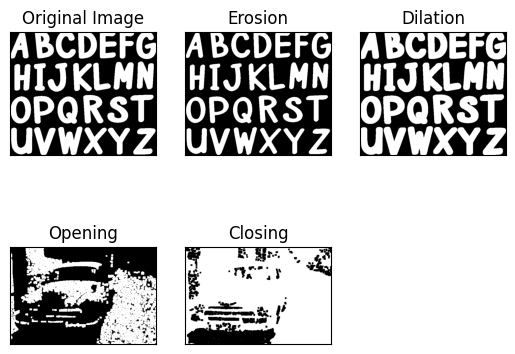

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('alpha.jpg', 0) 
img2=cv2.imread('noise.png',0)
kernel = np.ones((5,5), np.uint8)

# Erosion

binr = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
invert = cv2.bitwise_not(binr) 
erosion = cv2.erode(invert, kernel, iterations = 1)

# Dilation
dilation = cv2.dilate(invert, kernel, iterations = 1)

# Opening (erosion followed by dilation)
binr1 = cv2.threshold(img2, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
opening = cv2.morphologyEx(binr1, cv2.MORPH_OPEN, kernel)

# Closing (dilation followed by erosion)
closing = cv2.morphologyEx(binr1, cv2.MORPH_CLOSE, kernel)

titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [invert, erosion, dilation, opening, closing]

for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


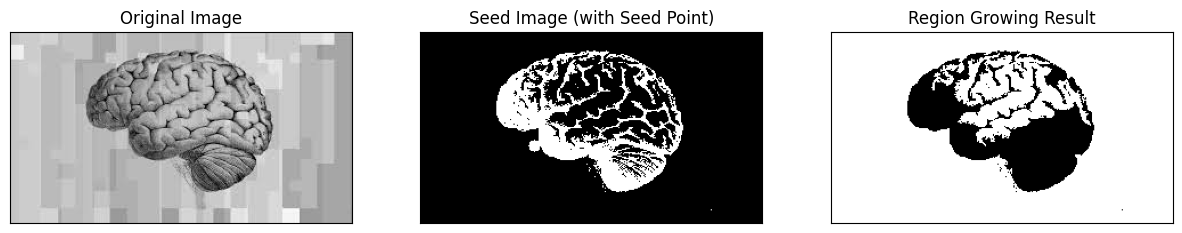

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for region growing
def region_growing(img, seed, threshold):
    h, w = img.shape
    output = np.zeros_like(img)
    pixel_list = [seed]
    
    while pixel_list:
        x, y = pixel_list.pop(0)
        if abs(int(img[x, y]) - int(img[seed])) < threshold and output[x, y] == 0:
            output[x, y] = 255
            
            # Check neighbors (4-connected)
            if x > 0: pixel_list.append((x-1, y))
            if x < h-1: pixel_list.append((x+1, y))
            if y > 0: pixel_list.append((x, y-1))
            if y < w-1: pixel_list.append((x, y+1))
    
    return output

# Load grayscale image
image = cv2.imread('brain.jpeg', 0)
binr = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
invert = cv2.bitwise_not(binr) 
# Define the seed point and threshold
seed_point = (100, 100)  # Change this according to your image
threshold = 10

# Create a copy of the original image to display the seed point
seed_image = invert.copy()
cv2.circle(seed_image, seed_point, 5, (255, 0, 0), -1)  # Highlight the seed point with a circle

# Apply region growing
result = region_growing(invert, seed_point, threshold)

# Plot the original image, seed image, and the region growing result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(seed_image, cmap='gray')
plt.title('Seed Image (with Seed Point)')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(result, cmap='gray')
plt.title('Region Growing Result')
plt.xticks([]), plt.yticks([])

plt.show()


In [2]:
image.shape

(168, 300)

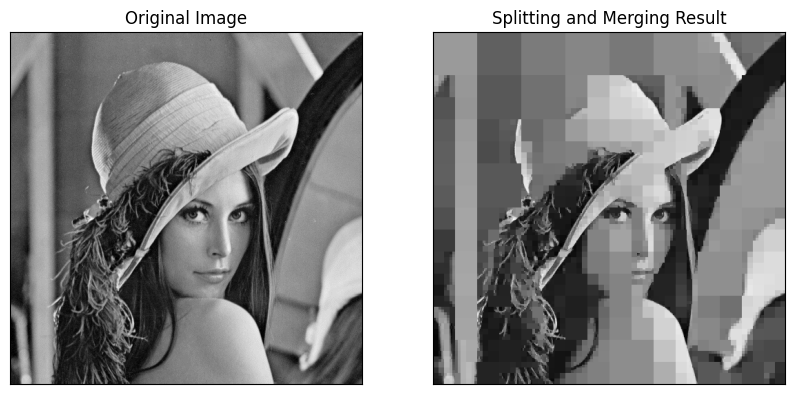

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for region splitting
def split(image, thresh):
    h, w = image.shape
    regions = [(0, h, 0, w)]
    
    def is_homogeneous(region):
        x1, x2, y1, y2 = region
        region_intensity = image[x1:x2, y1:y2]
        return np.std(region_intensity) < thresh
    
    def recursive_split(region):
        if is_homogeneous(region):
            return [region]
        else:
            x1, x2, y1, y2 = region
            mid_x = (x1 + x2) // 2
            mid_y = (y1 + y2) // 2
            return (recursive_split((x1, mid_x, y1, mid_y)) +  # Top-left
                    recursive_split((mid_x, x2, y1, mid_y)) +  # Bottom-left
                    recursive_split((x1, mid_x, mid_y, y2)) +  # Top-right
                    recursive_split((mid_x, x2, mid_y, y2)))   # Bottom-right
    
    # Apply splitting
    all_regions = []
    for region in regions:
        all_regions.extend(recursive_split(region))
    
    return all_regions

def merge_regions(regions):
    merged_image = np.zeros_like(image)
    for region in regions:
        x1, x2, y1, y2 = region
        merged_image[x1:x2, y1:y2] = np.mean(image[x1:x2, y1:y2])
    return merged_image

image = cv2.imread('kP0u2.png', 0)

regions = split(image, thresh=20)

merged_image = merge_regions(regions)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(merged_image, cmap='gray')
plt.title('Splitting and Merging Result')
plt.xticks([]), plt.yticks([])

plt.show()


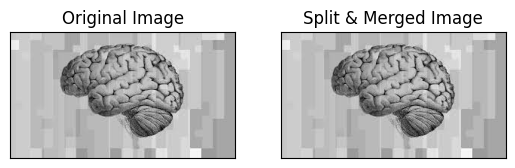

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('brain.jpeg', 0)

threshold = 35

def is_homogeneous(region):
    return np.std(region) < threshold

def split(image):
    h, w = image.shape
    subregions = []
    
    if is_homogeneous(image):
        return [image]
    
    if h // 2 == 0 or w // 2 == 0:
        return [image]
    
    top_left = image[:h//2, :w//2]
    top_right = image[:h//2, w//2:]
    bottom_left = image[h//2:, :w//2]
    bottom_right = image[h//2:, w//2:]
    
    subregions.extend(split(top_left))
    subregions.extend(split(top_right))
    subregions.extend(split(bottom_left))
    subregions.extend(split(bottom_right))
    
    return subregions

# Function to merge homogeneous regions
def merge(regions):
    # Implement the merging strategy
    # For simplicity, returning the regions without merging
    return regions

# Perform splitting
split_regions = split(image)

# Perform merging
merged_image = merge(split_regions)

# Display the results
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(merged_image[0], cmap='gray')
plt.title('Split & Merged Image'), plt.xticks([]), plt.yticks([])
plt.show()


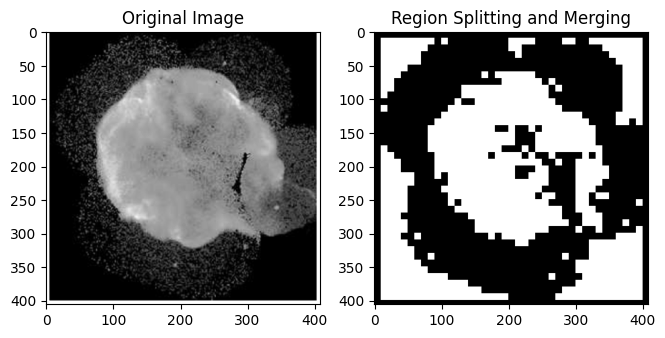

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(img, seed):
    height, width = img.shape
    segmented = np.zeros_like(img)
    segmented[seed] = 255
    region = [seed]
    while region:
        x, y = region.pop(0)
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width:
                    if img[nx, ny] == img[seed]:
                        if segmented[nx, ny] == 0:
                            segmented[nx, ny] = 255
                            region.append((nx, ny))
    return segmented

def region_splitting_and_merging(img, threshold):
    height, width = img.shape
    segmented = np.zeros_like(img)
    for i in range(0, height, 10):
        for j in range(0, width, 10):
            region = img[i:i+10, j:j+10]
            if np.std(region) < threshold:
                segmented[i:i+10, j:j+10] = 255
            else:
                segmented[i:i+10, j:j+10] = 0
    return segmented

# Load image
image = cv2.imread(r'regionINP.png', cv2.IMREAD_GRAYSCALE)

# Seed pixels for region growing
seed_pixels = [(100, 100)]

for i, seed_pixel in enumerate(seed_pixels):
    # Perform region growing
    segmented_region = region_growing(image, seed_pixel)

    # Perform region splitting and merging
    segmented_split_merge = region_splitting_and_merging(image, 10)

    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title('Region Splitting and Merging')
    plt.imshow(segmented_split_merge, cmap='gray')
    plt.show()

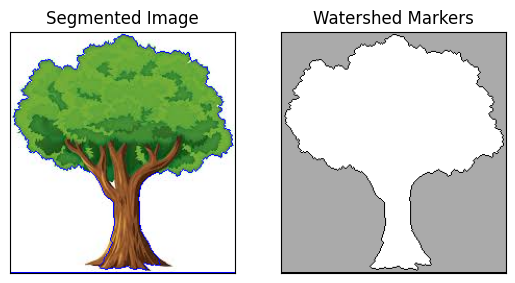

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('tree.jpeg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)

image[markers == -1] = [255, 0, 0]

plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(markers, cmap='gray')
plt.title('Watershed Markers'), plt.xticks([]), plt.yticks([])

plt.show()
